# Activity and Code

In [106]:
import pandas as pd

# Replace 'your_file_path.csv' with the path to the CSV file you want to read
# file_path = '/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/lexiconwex2022.csv'
file_path = "/Users/ruchiraray/Documents/UT Austin/Soc-HHR/lexiconwex2021.csv"

# Attempt to read the CSV file

df = pd.read_csv(file_path, header=0)
activity_code_df = df[df['6-digit activity code'].notna()][['6-digit activity code', 'Activity']]

activity_code_dict = pd.Series(activity_code_df['Activity'].values, index=activity_code_df['6-digit activity code']).to_dict()
print(len(activity_code_dict))

466


# ATUS Time

In [107]:
import pandas as pd
atus_summary_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atussum-2021/atussum_2021.csv', header=0)

In [108]:
atus_summary_df

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20210101210037,7.575483e+06,-1,60,2,39,1,2,2,1,...,0,0,0,0,0,75,0,0,0,0
1,20210101210081,8.737183e+06,10,30,2,42,1,2,1,1,...,0,0,0,0,60,150,0,0,0,0
2,20210101210099,3.023910e+07,-1,43,1,39,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,20210101210101,1.116551e+07,-1,23,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20210101210109,6.562833e+06,-1,20,1,40,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,20211212212479,3.571728e+07,-1,56,1,43,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
9083,20211212212502,1.220601e+07,-1,69,2,44,1,2,1,5,...,0,0,0,0,0,0,0,0,0,0
9084,20211212212555,4.810168e+06,-1,57,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
9085,20211212212567,1.138100e+07,6,34,2,43,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0


## Filter by Sex, Income Range, Age Range, Race, Number of Household Children, 

In [109]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atusrost-2021/atusrost_2021.csv')

# Group by 'TUCASEID' and count the unique 'TULINENO' entries for each 'TUCASEID'
household_counts = df.groupby('TUCASEID')['TULINENO'].nunique().reset_index()

# Rename columns to reflect the data
household_counts.columns = ['TUCASEID', 'Number of Household Members']

# Save the result to a new CSV file
# household_counts.to_csv('household_members_ATUS.csv', index=False)

In [110]:
sex_dict = {
    'male': 1,
    'female': 2
}

sex=None


income_mapping = {
    1:[0,5000],
    2:[5000,7499],
    3:[7500,9999],
    4:[10000,12499],
    5:[12500,14999],
    6:[15000,19999],
    7:[20000,24999],
    8:[25000,29999],
    9:[30000,34999],
    10:[35000,39999],
    11:[40000,49999],
    12:[50000,59999],
    13:[60000,74999],
    14:[75000,99999],
    15:[100000,149999],
    16:[150000,9999999999]
}

income=None

income_class=None
#high low mid

start_age = 0
end_age = 1000


raceasain_dict = {
    'Asian Indian': 1,
    'Chinese': 2,
    'Filipino': 3,
    'Japanese': 4,
    'Korean': 5,
    'Vietnamese': 6,
    'Other': 7
}

race_dict = {
    'White only': 1,
    'Black only': 2,
    'American Indian, Alaskan Native only': 3,
    'Asian only': 4,
    'Hawaiian/Pacific Islander only': 5,
    'White-Black': 6,
    'White-American Indian': 7,
    'White-Asian': 8,
    'White-Hawaiian': 9,
    'Black-American Indian': 10,
    'Black-Asian': 11,
    'Black-Hawaiian': 12,
    'American Indian-Asian': 13,
    'American Indian-Hawaiian': 14,
    'Asian-Hawaiian': 15,
    'White-Black-American Indian': 16,
    'White-Black-Asian': 17,
    'White-Black-Hawaiian': 18,
    'White-American Indian-Asian': 19,
    'White-American Indian-Hawaiian': 20,
    'White-Asian-Hawaiian': 21,
    'Black-American Indian-Asian': 22,
    'White-Black-American Indian-Asian': 23,
    'White-American Indian-Asian-Hawaiian': 24,
    'Other 3 race combinations': 25,
    'Other 4 and 5 race combinations': 26
}


race_name = None


# Sex


if sex:
    sex_number = sex_dict[sex]
    atus_summary_df=atus_summary_df[atus_summary_df['TESEX'] == sex_number]



# Income Claasification by family member threshold + poverty line 2021
if income_class:   
    # Load the data
    atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')
    household_members_df = household_counts
    # pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/household_members_ATUS.csv')
    thresh_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/thresholds.csv')

    # Merge atuscps_df with household_members_df to get the number of members for each household
    atuscps_df = atuscps_df.merge(household_members_df, on='TUCASEID')

    # Function to classify income based on HEFAMINC, number of members, and thresholds
    def classify_income(row, thresh_df):
        income_code = row['HEFAMINC']
        members = row['Members']
        
        # Map the income code to a range using income_mapping
        lower_limit, upper_limit = income_mapping[income_code]

        # Find the appropriate threshold for the number of members
        if members >= 9:  # Assuming last row in thresh_df is for 5 and above
            thresh_row = thresh_df.iloc[-1]
        else:
            thresh_row = thresh_df[thresh_df['Size'] == members].iloc[0]

        # # Classify income
        # if lower_limit==0:
        #     return 'low'
        # else:
        # Determine if it's mid based on the mapping and thresholds
        low_thresh = thresh_row['poverty']
        high_thresh = thresh_row['high']
        if upper_limit <= low_thresh:
            return 'low'
        elif lower_limit >= high_thresh:
            return 'high'
        else:
            return 'mid'

    # Apply the classification function
    atuscps_df['Income Classification'] = atuscps_df.apply(classify_income, args=(thresh_df,), axis=1)

    atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'Income Classification']], on='TUCASEID', how='left')

    atus_summary_df=atus_summary_df[atus_summary_df['Income Classification'] == "high"]

# Income

if income:
    # Load the data
    atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')

    # Merge atussum_df with classified_atuscps_df to get HEFAMINC value
    atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'HEFAMINC']], on='TUCASEID', how='left')

    # Filter rows where HEFAMINC is 2
    atus_summary_df = atus_summary_df[atus_summary_df['HEFAMINC'] == income]



# Income Range -custom 

# Age Range
start_age = 0
# int(input("Enter the start age: "))
end_age = 1000
# int(input("Enter the end age: "))
atus_summary_df = atus_summary_df[(atus_summary_df['TEAGE'] >= start_age) & (atus_summary_df['TEAGE'] <= end_age)]


# Race


if race_name:
    race_number = race_dict[race_name]
    atus_summary_df=atus_summary_df[atus_summary_df['PTDTRACE'] == race_number]



# Number of Household Children - no direct way



In [111]:
# atus_summary_df = atus_summary_df[(atus_summary_df['TEAGE'] >= 5) & (atus_summary_df['TEAGE'] <= 40)]
# atus_summary_df

In [112]:
activity_columns = atus_summary_df.columns[24:-1]

# Calculate the average time spent on each activity, ignoring zeros
average_time = atus_summary_df[activity_columns].mean()
variance = atus_summary_df[activity_columns].var()
# 2. Mean for non-zero entries
non_zero_mean = atus_summary_df[activity_columns].apply(lambda x: x[x != 0].mean())

# 3. Variance for non-zero entries
non_zero_variance = atus_summary_df[activity_columns].apply(lambda x: x[x != 0].var())

# atus_summ    ary_df
# Create a DataFrame from the average time Series
average_time_df = average_time.reset_index()
average_time_df.columns = ['Activity Code', 'Average Time Spent']
# average_time_df

average_time_df['Activity Code'] = average_time_df['Activity Code'].str.lstrip('t')

# Now map the activity code to names using the dictionary created from activity codes DataFrame
activity_code_dict = activity_code_df.set_index('6-digit activity code')['Activity'].to_dict()

# average_time_df['Activity'] = average_time_df['Activity Code'].astype(int).map(activity_code_dict)
average_time_df['Activity'] = average_time_df['Activity Code'].astype(str).map(activity_code_dict)


# print(average_time_df)
# Drop rows with NaN values in 'Activity Name' if there are any codes not matching
average_time_df.dropna(subset=['Activity'], inplace=True)
print(average_time_df)


# Create DataFrames from the non-zero means and variances to merge
non_zero_mean_df = non_zero_mean.reset_index().rename(columns={'index': 'Activity Code', 0: 'Mean_NZ'})
non_zero_variance_df = non_zero_variance.reset_index().rename(columns={'index': 'Activity Code', 0: 'Variance_NZ'})
variance_df = variance.reset_index().rename(columns={'index': 'Activity Code', 0: 'Variance'})
# Convert Activity Code for merging
non_zero_mean_df['Activity Code'] = non_zero_mean_df['Activity Code'].str.lstrip('t')
non_zero_variance_df['Activity Code'] = non_zero_variance_df['Activity Code'].str.lstrip('t')
variance_df['Activity Code'] = variance_df['Activity Code'].str.lstrip('t')

non_zero_variance_df = non_zero_variance_df.dropna()
non_zero_mean_df = non_zero_mean_df.dropna()

# Merge the statistics with the average_time_df
average_time_df = average_time_df.merge(non_zero_mean_df, on='Activity Code', how='left')
average_time_df = average_time_df.merge(non_zero_variance_df, on='Activity Code', how='left')
average_time_df = average_time_df.merge(variance_df, on='Activity Code', how='left')


# Print and save the final DataFrame
# average_time_df.to_csv('path_to_your_directory/average_activity_time.csv', index=False)
# average_time_df = average_time_df.sort_values(by='Average Time Spent', ascending=False)
average_time_df = average_time_df.dropna()

average_time_df.to_csv("activity_time_2021_.csv", index=False)  

    Activity Code  Average Time Spent  \
0          010101          536.680973   
1          010102            5.037526   
2          010201           37.984373   
3          010299            0.011005   
4          010301            4.528667   
..            ...                 ...   
370        189999            2.514361   
371        500101            5.003962   
372        500103            0.537691   
373        500105            0.295807   
374        500106            3.606801   

                                              Activity  
0                                             Sleeping  
1                                        Sleeplessness  
2               Washing, dressing and grooming oneself  
3                                    Grooming, n.e.c.*  
4                             Health-related self care  
..                                                 ...  
370                                 Traveling, n.e.c.*  
371                    Insufficient detail in verba

In [113]:
average_time_df

,Activity Code,Average Time Spent,Activity,Mean_NZ,Variance_NZ,Variance
0,010101,536.680973,Sleeping,537.390634,17223.887393,17582.042939
1,010102,5.037526,Sleeplessness,83.685558,10293.908271,1014.821286
2,010201,37.984373,"Washing, dressing and grooming oneself",50.418346,1212.501367,1385.794825
3,010299,0.011005,"Grooming, n.e.c.*",25.000000,166.666667,0.330057
4,010301,4.528667,Health-related self care,58.206506,19540.368060,1761.440709
...,...,...,...,...,...,...
370,189999,2.514361,"Traveling, n.e.c.*",90.666667,25141.003984,916.189289
371,500101,5.003962,Insufficient detail in verbatim,60.790107,2414.439152,477.684114
372,500103,0.537691,Missing travel or destination,37.297710,1799.164533,45.509668
373,500105,0.295807,"Respondent refused to provide information/""non...",76.800000,1730.341176,29.107954


/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/3105234741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=atus_summary_df, x='TESEX', palette='viridis')


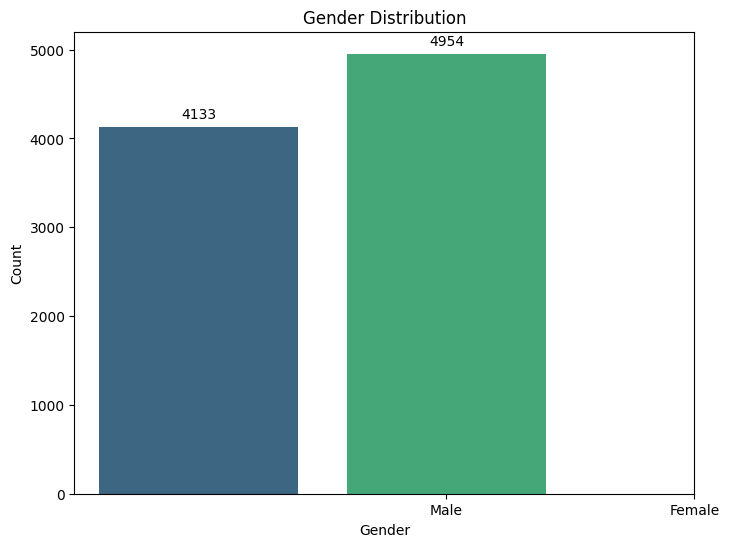

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
barplot = sns.countplot(data=atus_summary_df, x='TESEX', palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([1, 2], ['Male', 'Female'])

# Annotate each bar with the count
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


In [115]:
atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')

# Merge atussum_df with classified_atuscps_df to get HEFAMINC value
atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'HEFAMINC']], on='TUCASEID', how='left')

/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/2307106183.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=atus_summary_df, x='HEFAMINC', palette='viridis')


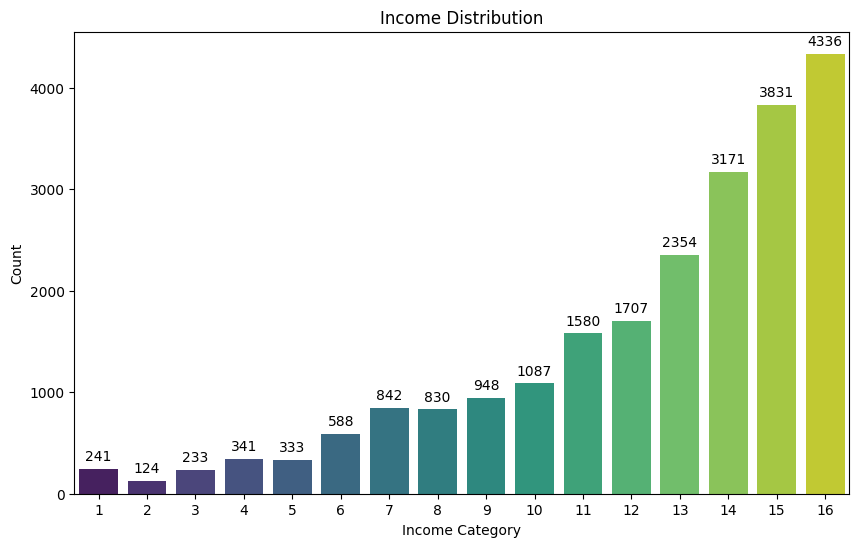

In [116]:
# Load the data


# plt.figure(figsize=(10, 6))
# sns.countplot(data=atus_summary_df, x='HEFAMINC', palette='viridis')
# plt.title('Income Distribution')
# plt.xlabel('Income Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()

plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=atus_summary_df, x='HEFAMINC', palette='viridis')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate each bar with the count
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()


/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/953921754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=atus_summary_df, x='PTDTRACE', palette='viridis')


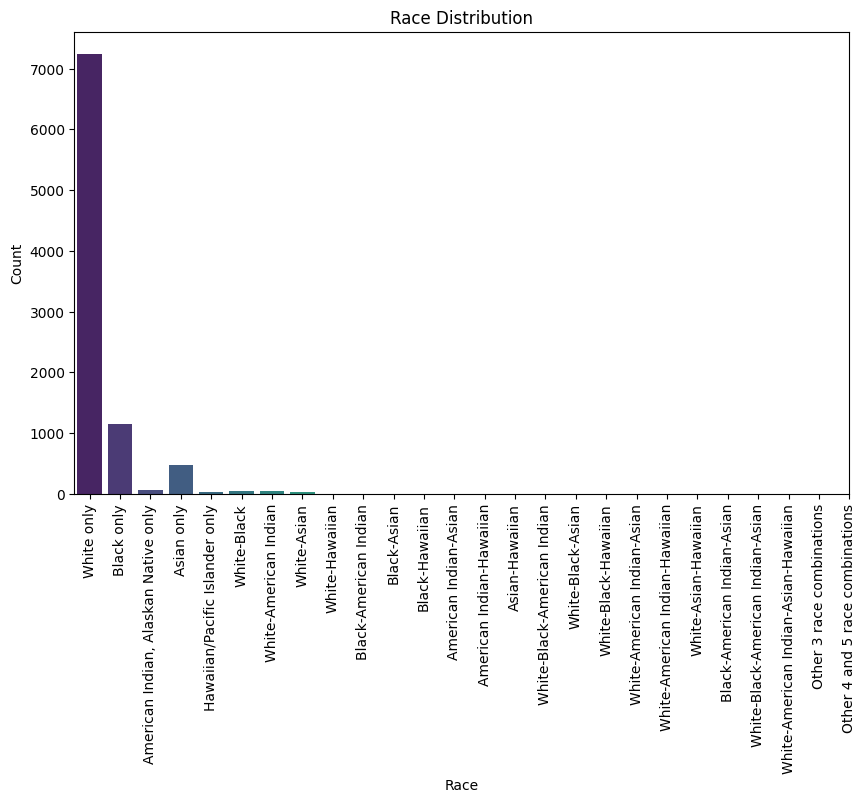

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(data=atus_summary_df, x='PTDTRACE', palette='viridis')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(ticks=range(0, 26), labels=list(race_dict.keys()), rotation=90)
plt.show()


In [78]:
unique_races = atus_summary_df['PTDTRACE'].unique()
unique_races

array([ 1,  2,  4,  3,  6,  7,  5,  8, 10, 15, 11, 16,  9])

/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/3203917743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=atus_summary_df, x='PTDTRACE', palette='viridis')


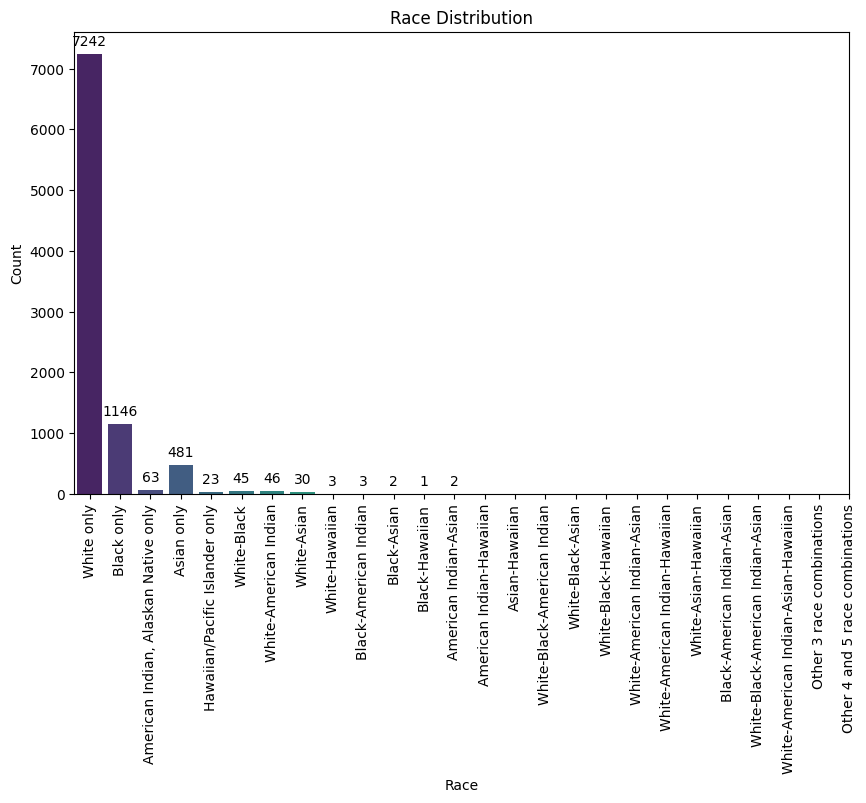

In [88]:
plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=atus_summary_df, x='PTDTRACE', palette='viridis')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(ticks=range(0, 26), labels=list(race_dict.keys()), rotation=90)

# Annotate each bar with the count
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()
